## In this notebook I will be performing an Exploratory Data Analysis on the 20 newsgroup dataset.

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def prepare_data(data):
    #Seperate data into individual lists from the dictionary
    documents = data["data"]
    #Seperate document labels into individual lists from the dictionary
    target = data["target"]
    #Get list of target names
    names = list(data.target_names)
    #Get the target number for docs
    target_names = list(data.target)
    #Replace number with names
    for i in range(len(target_names)):
        target_names[i] = names[target_names[i]]
    #Create a dataframe
    df = pd.DataFrame({'documents':documents,'class_no':target, 'class_name': target_names})
    return df
    

### Import Dataset

In [3]:
newsgroups_data = fetch_20newsgroups()

### Preparing the data

In [4]:
newsgroups_data_df = prepare_data(newsgroups_data)

In [5]:
newsgroups_data_df.head(10)

,documents,class_no,class_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16,talk.politics.guns
6,From: bmdelane@quads.uchicago.edu (brian manni...,13,sci.med
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3,comp.sys.ibm.pc.hardware
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2,comp.os.ms-windows.misc
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4,comp.sys.mac.hardware


In [6]:
newsgroups_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   documents   11314 non-null  object
 1   class_no    11314 non-null  int32 
 2   class_name  11314 non-null  object
dtypes: int32(1), object(2)
memory usage: 221.1+ KB


#### We have about 11K documents to be classified into their respective classes

### Understanding the text data

In [7]:
docs = list(newsgroups_data_df.documents)

In [8]:
docs[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

#### We can see that our text data has a lot of noise like the special characters, numbers, stop words, etc.

### Understanding the target variable

In [9]:
#check the number of unique values in the target
newsgroups_data_df.class_name.unique()

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt'],
      dtype=object)

#### In short there ar about 20 different labels that can be asigned to the following classes:
#### computers, science, politics, sports, vehicles, religion and miscellaneous.

<AxesSubplot:xlabel='class_no', ylabel='Density'>

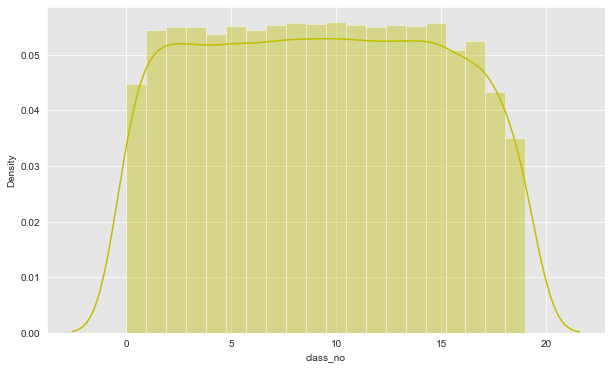

In [10]:
plt.figure(figsize = (10, 6))
sn.set_style("darkgrid", {"axes.facecolor": ".9"})
sn.distplot(newsgroups_data_df.class_no, bins = 20, color = 'y')
#plt.barh(newsgroups_data_df.class_name)

<AxesSubplot:xlabel='class_no'>

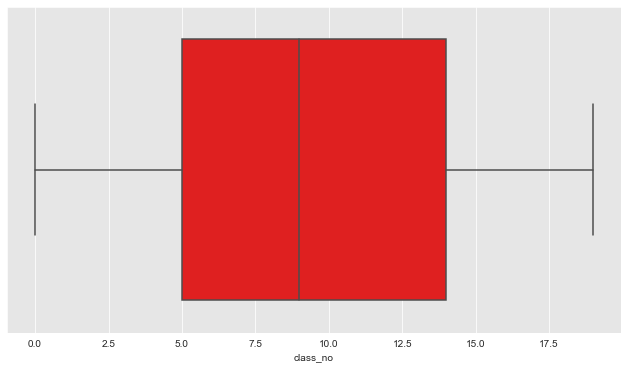

In [14]:
plt.figure(figsize = (11, 6))
sn.set_style("darkgrid", {"axes.facecolor": ".9"})
sn.boxplot(newsgroups_data_df.class_no, color = 'red')

#### As we can see from the above plots the classes are evenly distributed in our dataset.

Now that I have explored the data I will be moving to data preprocessing and to build various ML models for clustering the documents.